# Introduction
In this analysis, we aim to study how generated rotated ligands distribute in the space of interest pre-minimization. The function __angles_generator__ supports two different distributions, `uniform` and `normal`. For each, 500, 1000, 5000, 10000, and 20000 ligands' conformations were randomly generated. Then, we plot their RMSD value to the true conformation. 

Complex and random seed used are `1AY7` and `distribution.seed`, respectively.

### Notice
Since all data are saved, data generation steps can be skipped by clicking [Plot](#Plot)

In [1]:
import os
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Change working directory to the root
os.chdir('../')

In [2]:
from models.complex import Complex
import dockerasmus.pdb as pdb
import models.protein
from functions import angles_generator
import Analysis.get_seed as get_seed
# Set numpy random seed
np.random.set_state(get_seed.get('Analysis/seeds/distribution.seed'))

In [3]:
# load receptor and ligand files
lig_path = 'test/1AY7_l_sep_2za4_AB_aligned.pdb'
rec_path = 'test/1AY7_r.pdb'
true_lig_path = 'test/1AY7_l_true.pdb'
res = open('Analysis/Results/rotation_analysis.txt','w')
print('\t'.join(['Test','Complex','Distribution','Minimization','RMSD']),file=res)


In [4]:
def rmsd(A,B):
    return math.sqrt(np.mean(np.sum((A-B)**2,axis=1)))

In [5]:
lig = pdb.Protein.from_pdb_file(lig_path)
rec = pdb.Protein.from_pdb_file(rec_path)
true_lig = pdb.Protein.from_pdb_file(true_lig_path)
cpx = Complex(lig=lig,rec=rec)

In [6]:
# Data generating
for dist in ['uniform','normal']:
    for nb in [500,1000,5000,10000,20000]:
        for idx, l in enumerate(angles_generator(nb,dist=dist)):
            A = cpx.rotations(l[0],l[1],l[2],l[3],l[4])
            print('\t'.join([str(nb),'lig',dist,'0',str(rmsd(true_lig.atom_positions(),A))]),file=res)
res.close()

# Plot

Graphic presentation using `seaborn`

In [7]:
df = pd.read_csv('Analysis/Results/rotation_analysis.txt',sep='\t')

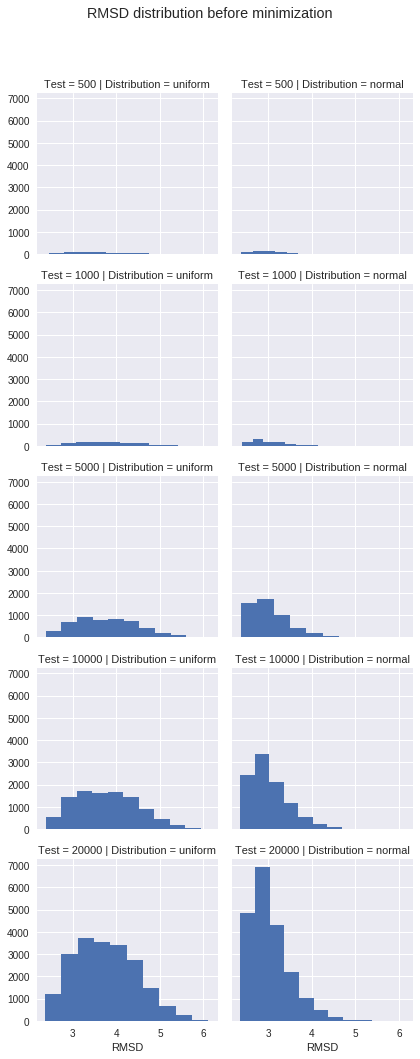

In [8]:
# Plot RMSD histogram, the left column is uniform distribution and the right one is normal distribution
g = sns.FacetGrid(df,col='Distribution',row='Test')
g = g.map(plt.hist, "RMSD")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('RMSD distribution before minimization')
g.savefig('Analysis/Results/Distribution_hist.png')
plt.show()

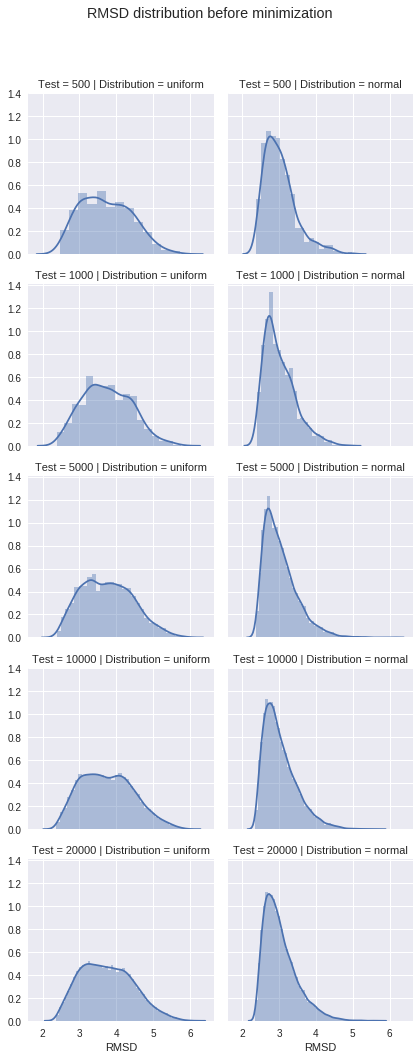

In [9]:
# Plot RMSD distribution
g = sns.FacetGrid(df,col='Distribution',row='Test')
g = g.map(sns.distplot, "RMSD")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('RMSD distribution before minimization')
g.savefig('Analysis/Results/Distribution_density.png')
plt.show()